# Tổng quan dữ liệu

## Tổng quan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv("Data/powerconsumption.csv")
df.head()


,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


## Thống kê tổng quát 

In [4]:
print("Shape:", df.shape)
print("\nThông tin kiểu dữ liệu:")
print(df.info())
print("\nThống kê tổng quát:")
print(df.describe())


Shape: (52416, 9)

Thông tin kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB
None

Thống kê tổng quát:
        Temperature      Humidity     WindSpeed  GeneralDiffuseFlows  \
count  52416.000000  52416.000000  52416.000000         52416.000000   
mean      18.810024     68.259518      1.959

# Tiền xử lí dữ liệu

## Kiểm tra dữ liệu thiếu của hàng và cột

In [5]:
print("Số lượng giá trị thiếu theo cột:")
print(df.isnull().sum())
print("\nSố lượng giá trị thiếu theo hàng:")
print(df.isnull().sum(axis=1))

Số lượng giá trị thiếu theo cột:
Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

Số lượng giá trị thiếu theo hàng:
0        0
1        0
2        0
3        0
4        0
        ..
52411    0
52412    0
52413    0
52414    0
52415    0
Length: 52416, dtype: int64


In [8]:
missing = df.isnull().sum()
print("📋 Giá trị thiếu:")
print(missing[missing > 0])

# Loại bỏ các dòng có giá trị thiếu
df = df.dropna()
print(f"✅ Đã loại bỏ dòng có giá trị thiếu. Số dòng còn lại: {len(df)}")

📋 Giá trị thiếu:
Series([], dtype: int64)
✅ Đã loại bỏ dòng có giá trị thiếu. Số dòng còn lại: 52416


## Xử lí thời gian

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['Weekday'] = df['Datetime'].dt.weekday
df[['Datetime', 'Hour', 'Minute', 'Day', 'Month', 'Weekday']].head()

,Datetime,Hour,Minute,Day,Month,Weekday
0,2017-01-01 00:00:00,0,0,1,1,6
1,2017-01-01 00:10:00,0,10,1,1,6
2,2017-01-01 00:20:00,0,20,1,1,6
3,2017-01-01 00:30:00,0,30,1,1,6
4,2017-01-01 00:40:00,0,40,1,1,6


## Ma trận tương quan

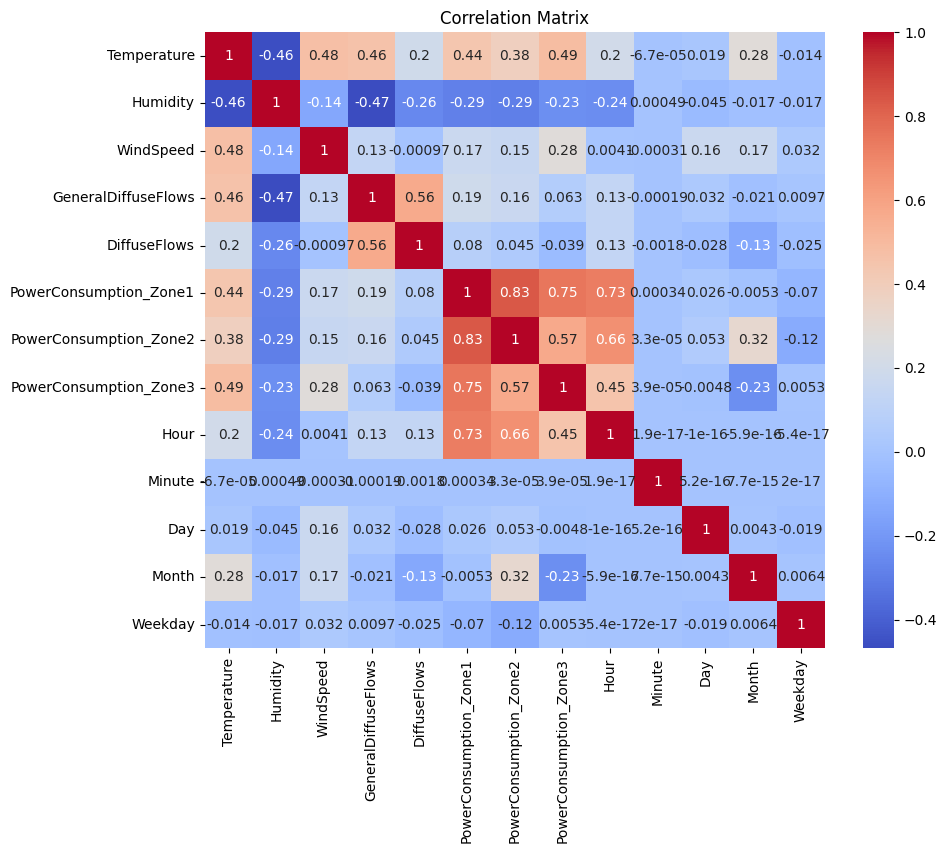

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Biểu đồ phân phối

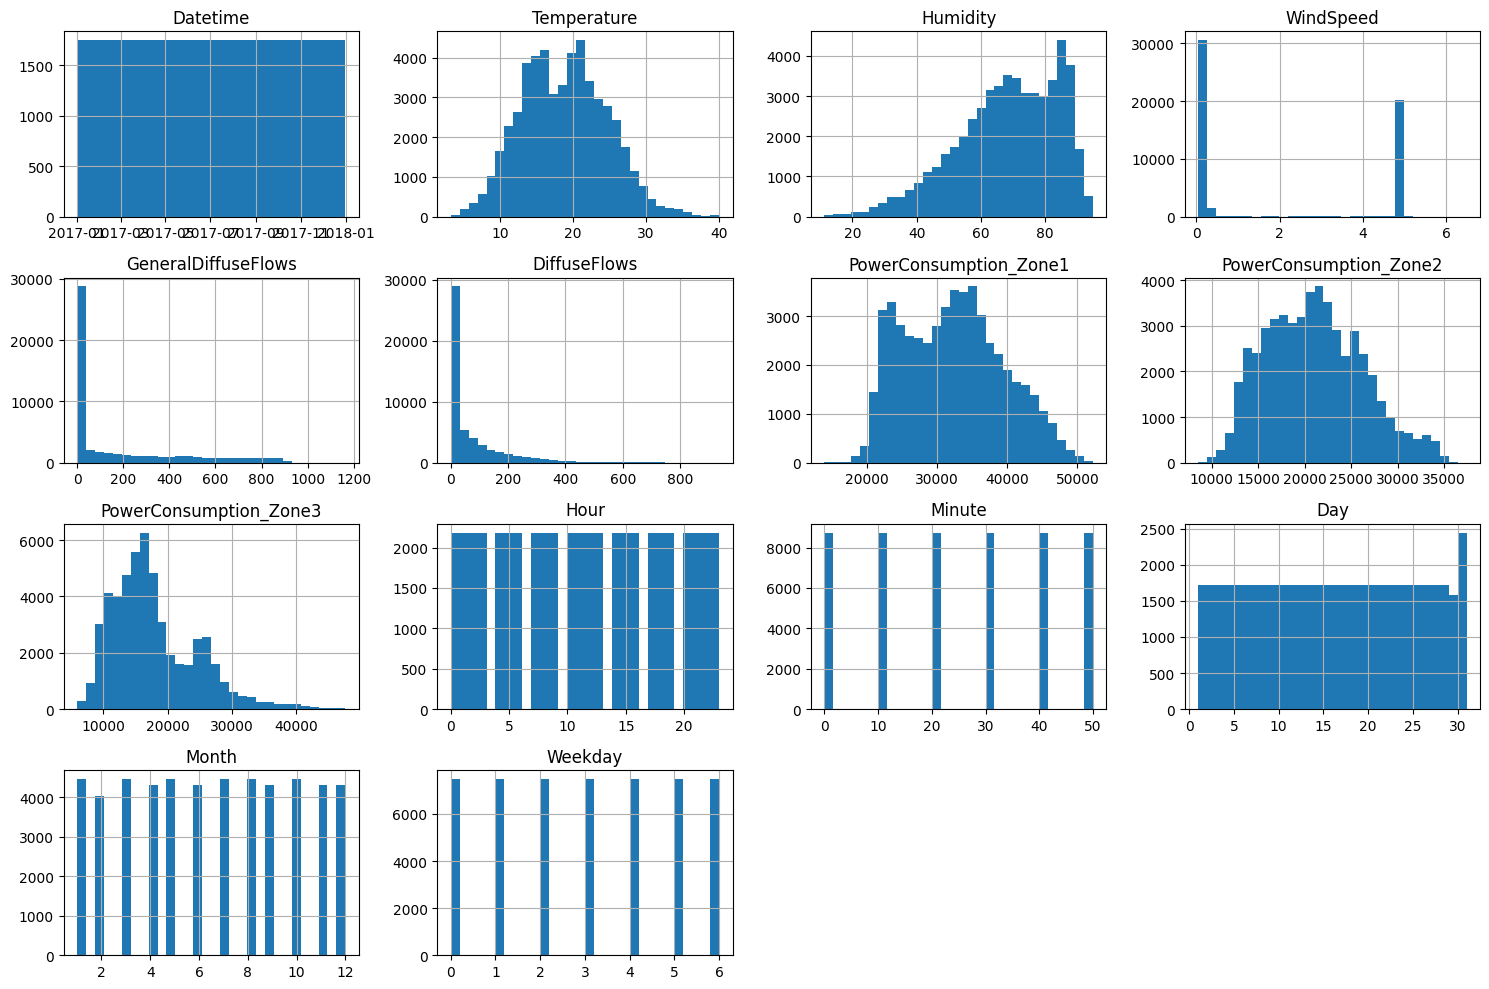

In [11]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


Train mô hình

Đánh giá mô hình

Lưu mô hình